# Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')

import os
import tensorflow as tf
import keras
import cv2

from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers , models, optimizers

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import *
from tensorflow.keras.applications import ResNet50V2

# **Visualizing Predictions**

In [ ]:
Emotion_Classes = ['Angry',
                  'Disgust',
                  'Fear',
                  'Happy',
                  'Neutral',
                  'Sad',
                  'Surprise']

In [ ]:
# Shuffling Test Data to show diffrent classes
test_preprocessor = ImageDataGenerator(
        rescale = 1 / 255.,
    )

test_generator = test_preprocessor.flow_from_directory(
    test_data_path,
    class_mode="categorical",
    target_size=(img_shape,img_shape),
    color_mode="rgb",
    shuffle=True,
    batch_size=batch_size,
)

Found 7179 images belonging to 7 classes.


# **Music Dataset**

In [ ]:
Music_Player = pd.read_csv("~/Downloads/EmotionBasedMusicRecommendationSystem/EmotionBasedMusicRecommendationSystem/dataset/data_moods.csv")
Music_Player = Music_Player[['name','artist','mood','popularity']]
Music_Player.head()

,name,artist,mood,popularity
0,1999,Prince,Happy,68
1,23,Blonde Redhead,Sad,43
2,9 Crimes,Damien Rice,Sad,60
3,99 Luftballons,Nena,Happy,2
4,A Boy Brushed Red Living In Black And White,Underoath,Energetic,60


In [ ]:
Music_Player["mood"].value_counts()

mood
Sad          197
Calm         195
Energetic    154
Happy        140
Name: count, dtype: int64

In [ ]:
Music_Player["popularity"].value_counts()

popularity
0     92
51    23
52    22
50    21
55    21
      ..
80     1
2      1
14     1
15     1
88     1
Name: count, Length: 83, dtype: int64

In [ ]:
Play = Music_Player[Music_Player['mood'] =='Calm' ]
Play = Play.sort_values(by="popularity", ascending=False)
Play = Play[:5].reset_index(drop=True)
display(Play)

,name,artist,mood,popularity
0,Lost,Annelie,Calm,64
1,Curiosity,Beau Projet,Calm,60
2,Escaping Time,Benjamin Martins,Calm,60
3,Just Look at You,369,Calm,59
4,Vague,Amaranth Cove,Calm,59


In [ ]:
# Making Songs Recommendations Based on Predicted Class
def Recommend_Songs(pred_class):

    if( pred_class=='Disgust' ):

        Play = Music_Player[Music_Player['mood'] =='Sad' ]
        Play = Play.sort_values(by="popularity", ascending=False)
        Play = Play[:5].reset_index(drop=True)
        display(Play)

    if( pred_class=='Happy' or pred_class=='Sad' ):

        Play = Music_Player[Music_Player['mood'] =='Happy' ]
        Play = Play.sort_values(by="popularity", ascending=False)
        Play = Play[:5].reset_index(drop=True)
        display(Play)

    if( pred_class=='Fear' or pred_class=='Angry' ):

        Play = Music_Player[Music_Player['mood'] =='Calm' ]
        Play = Play.sort_values(by="popularity", ascending=False)
        Play = Play[:5].reset_index(drop=True)
        display(Play)

    if( pred_class=='Surprise' or pred_class=='Neutral' ):

        Play = Music_Player[Music_Player['mood'] =='Energetic' ]
        Play = Play.sort_values(by="popularity", ascending=False)
        Play = Play[:5].reset_index(drop=True)
        display(Play)

# **Predicting New Images**

**Downloading OpenCV haarcascade frontalface Detection**

In [ ]:
import requests

url = "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml"
r = requests.get(url)

# Ensure the request was successful
if r.status_code == 200:
    with open("haarcascade_frontalface_default.xml", "wb") as f:
        f.write(r.content)
    print("File downloaded successfully!")
else:
    print("Failed to retrieve the file")

File downloaded successfully!


In [ ]:
import cv2

# Path to the image file
image_path = r'C:\Users\SMares\Downloads\EmotionBasedMusicRecommendationSystem\EmotionBasedMusicRecommendationSystem\dataset\test\sad\PrivateTest_11904014.jpg'

# Load the image
img = cv2.imread(image_path)

# Check if the image was loaded successfully
if img is not None:
    # Display the image
    cv2.imshow('Loaded Image', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print("Failed to load the image.")

In [ ]:


def load_and_prep_image(filename, img_shape=224):
    # Expand user directory
    filename = os.path.expanduser(filename)

    # Check if the file exists
    if not os.path.exists(filename):
        raise FileNotFoundError(f"No such file: '{filename}'")

    # Load the image
    img = cv2.imread(filename)

    # Check if the image is loaded correctly
    if img is None:
        raise ValueError(f"Failed to load image from {filename}")

    # Convert to grayscale
    GrayImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = faceCascade.detectMultiScale(GrayImg, 1.1, 4)

    for x, y, w, h in faces:
        img = img[y:y+h, x:x+w]

    # Resize the image
    img = cv2.resize(img, (img_shape, img_shape))
    img = img / 255.0  # Normalize to [0, 1]

    return img

def pred_and_plot(filename, class_names):
    # Import the target image and preprocess it
    img = load_and_prep_image(filename)

    # Make a prediction
    pred = CNN_Model.predict(np.expand_dims(img, axis=0))

    # Get the predicted class
    pred_class = class_names[np.argmax(pred)]

    # Plot the image with the predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False)
    plt.show()

# Example usage
file_path = "~/Downloads/EmotionBasedMusicRecommendationSystem/EmotionBasedMusicRecommendationSystem/dataset/test/sad/PrivateTest_11715431.jpg"
pred_and_plot(file_path, Emotion_Classes)

# Predicting New Images

In [ ]:
# Download Haar Cascade XML file using requests
import requests

url = "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml"
response = requests.get(url)

with open("haarcascade_frontalface_default.xml", "wb") as file:
    file.write(response.content)

# Verify the file is downloaded
import os
if os.path.exists("haarcascade_frontalface_default.xml"):
    print("File downloaded successfully")
else:
    print("Failed to download the file")

File downloaded successfully


In [ ]:
import cv2

# Load the Haar Cascade Classifier
faceCascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

# Verify that the classifier loaded correctly
if faceCascade.empty():
    print("Failed to load the cascade classifier")
else:
    print("Cascade classifier loaded successfully")

Cascade classifier loaded successfully


In [ ]:
def load_and_prep_image(filename, img_shape=224):
    # Expand user directory
    filename = os.path.expanduser(filename)

    # Check if the file exists
    if not os.path.exists(filename):
        raise FileNotFoundError(f"No such file: '{filename}'")

    # Load the image
    img = cv2.imread(filename)

    # Check if the image is loaded correctly
    if img is None:
        raise ValueError(f"Failed to load image from {filename}")

    # Convert to grayscale
    GrayImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = faceCascade.detectMultiScale(GrayImg, 1.1, 4)

    for x, y, w, h in faces:
        img = img[y:y+h, x:x+w]

    # Resize the image
    img = cv2.resize(img, (img_shape, img_shape))
    img = img / 255.0  # Normalize to [0, 1]

    return img

In [ ]:
def pred_and_plot(filename, class_names):
    # Import the target image and preprocess it
    img = load_and_prep_image(filename)

    # Make a prediction
    pred = ResNet50V2_Model.predict(np.expand_dims(img, axis=0))

    # Get the predicted class
    pred_class = class_names[np.argmax(pred)]

    # Plot the image with the predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False)
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


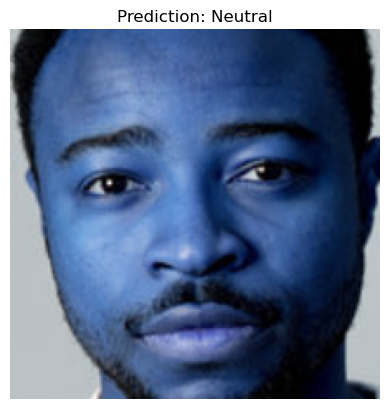

In [ ]:
# Additional Error Handling for FileNotFoundError
try:
    pred_and_plot(file_path, Emotion_Classes)
except FileNotFoundError as e:
    print(e)
except ValueError as e:
    print(e)

# Demo

In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def load_and_prep_image(filename, img_shape=128):
    """ Load and prepare an image for model prediction. """
    img = cv2.imread(filename)
    if img is None:
        raise FileNotFoundError(f"Image file not found: {filename}")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (img_shape, img_shape))
    img = img.astype('float32') / 255.0
    return img

def predict_emotion(image_path):
    """ Predict the emotion from an image. """
    img = load_and_prep_image(image_path)
    pred = model.predict(np.expand_dims(img, axis=0))
    pred_class = Emotion_Classes[np.argmax(pred)]
    return pred_class

def get_song_recommendations(emotion):
    """ Get song recommendations based on the predicted emotion. """
    if emotion == 'Disgust':
        filter_mood = 'Sad'
    elif emotion in ['Happy', 'Sad']:
        filter_mood = 'Happy'
    elif emotion in ['Fear', 'Angry']:
        filter_mood = 'Calm'
    elif emotion in ['Surprise', 'Neutral']:
        filter_mood = 'Energetic'

    songs = Music_Player[Music_Player['mood'] == filter_mood]
    return songs[['name', 'album', 'artist', 'mood']].head(5).to_dict(orient='records')

def display_results(image_path, predicted_emotion, song_recommendations):
    """ Display the image, predicted emotion, and song recommendations. """
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(15, 8))

    # Display the input image
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Input Image')
    plt.axis('off')

    # Display the prediction and recommendations
    plt.subplot(1, 2, 2)
    plt.axis('off')
    text = f"Predicted Emotion: {predicted_emotion}\n\nSong Recommendations:\n"
    for song in song_recommendations:
        song_info = f"Song: {song['name']}\nAlbum: {song['album']}\nArtist: {song['artist']}\nEmotion: {song['mood']}\n"
        text += song_info + "\n"

    plt.text(0.01, 0.5, text, fontsize=12, va='center', ha='left')
    plt.tight_layout()
    plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


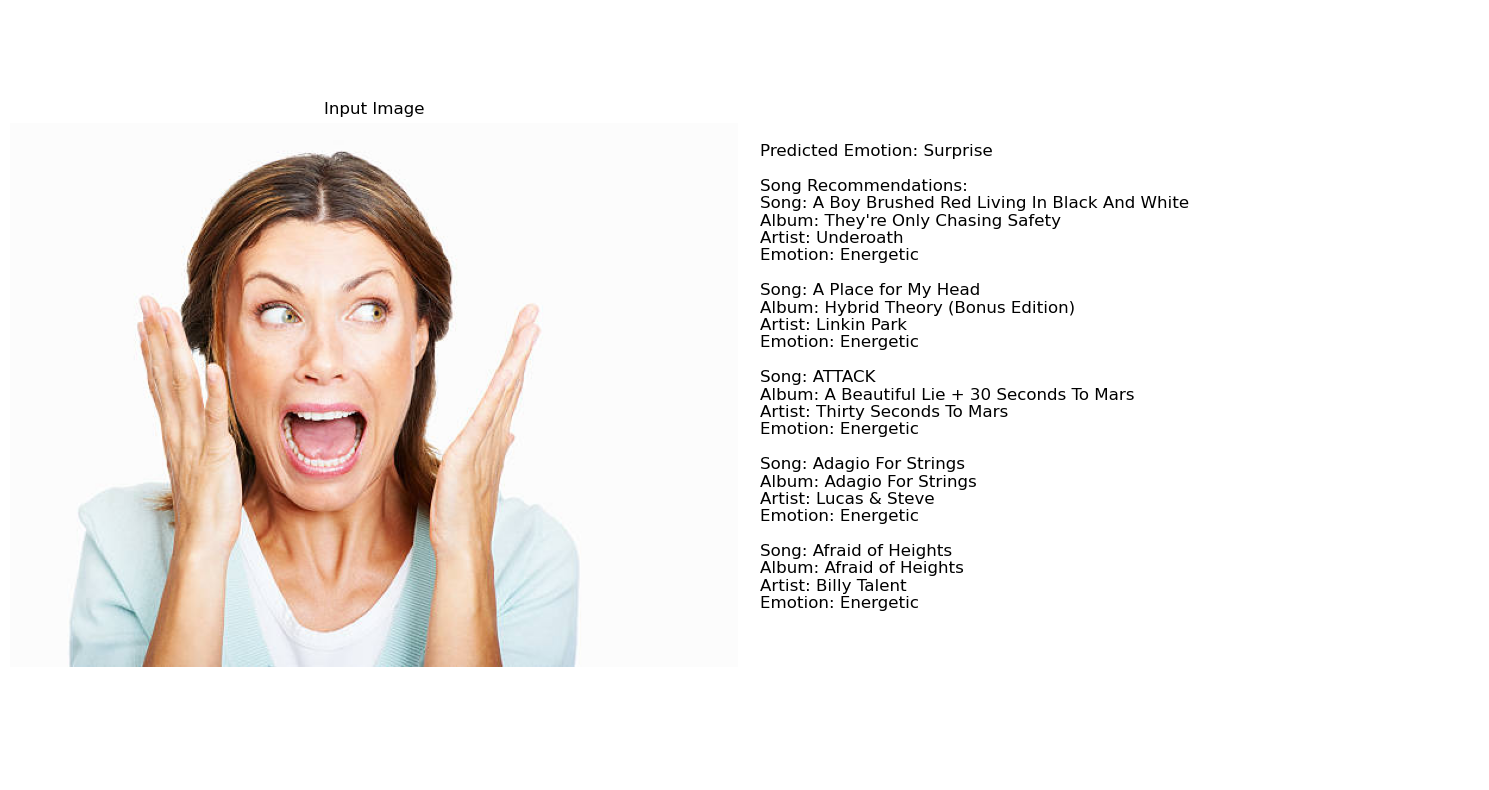

In [ ]:
# Example usage
image_path = r'C:\Users\SMares\Downloads\EmotionBasedMusicRecommendationSystem\EmotionBasedMusicRecommendationSystem/uploads/images.jpg'  # Update with the actual path to your image
predicted_emotion = predict_emotion(image_path)
song_recommendations = get_song_recommendations(predicted_emotion)
display_results(image_path, predicted_emotion, song_recommendations)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


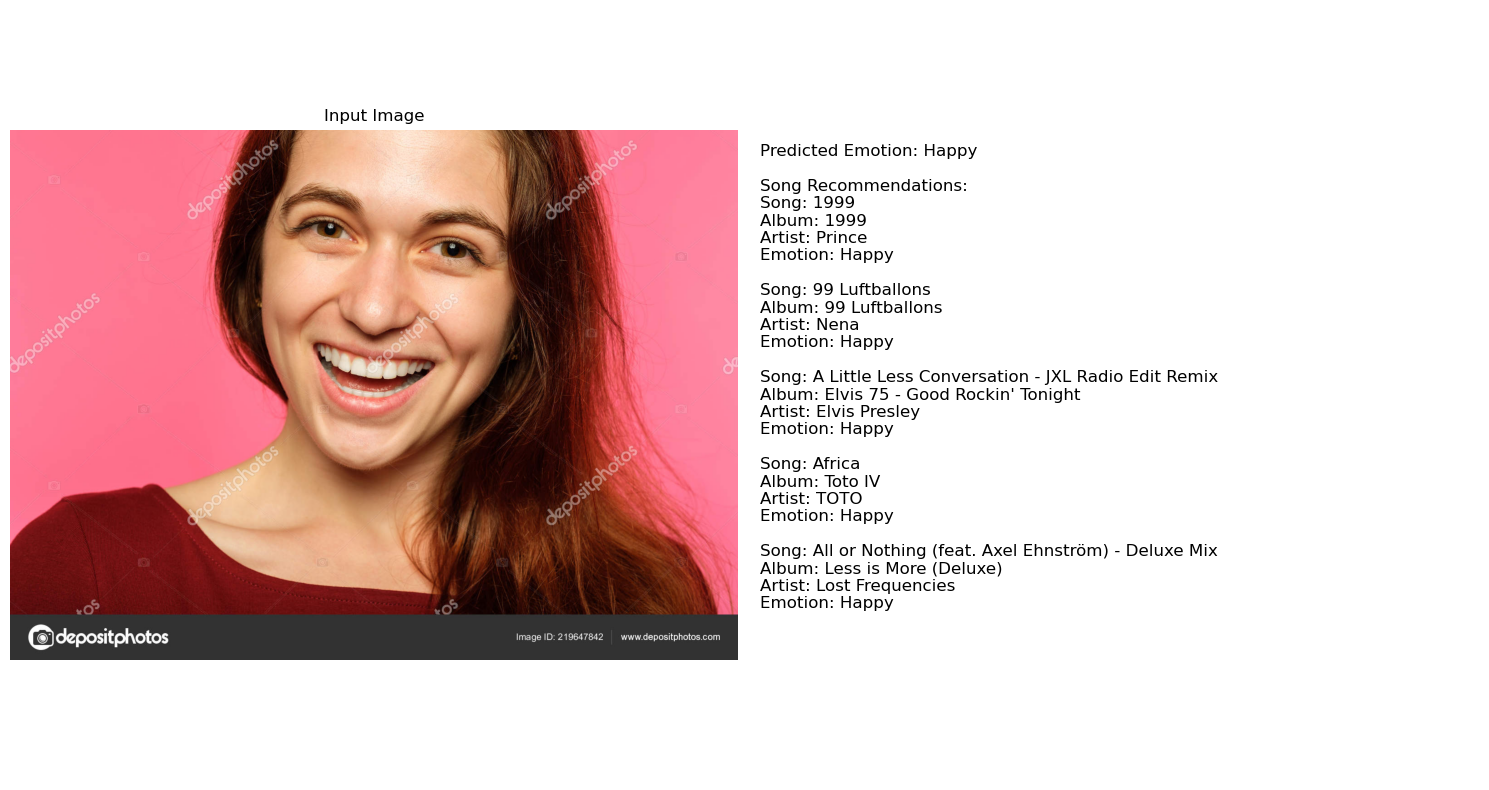

In [ ]:
# Example usage
image_path = r'C:\Users\SMares\Downloads\EmotionBasedMusicRecommendationSystem\EmotionBasedMusicRecommendationSystem/uploads/happy image rec test.jpg'  # Update with the actual path to your image
predicted_emotion = predict_emotion(image_path)
song_recommendations = get_song_recommendations(predicted_emotion)
display_results(image_path, predicted_emotion, song_recommendations)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


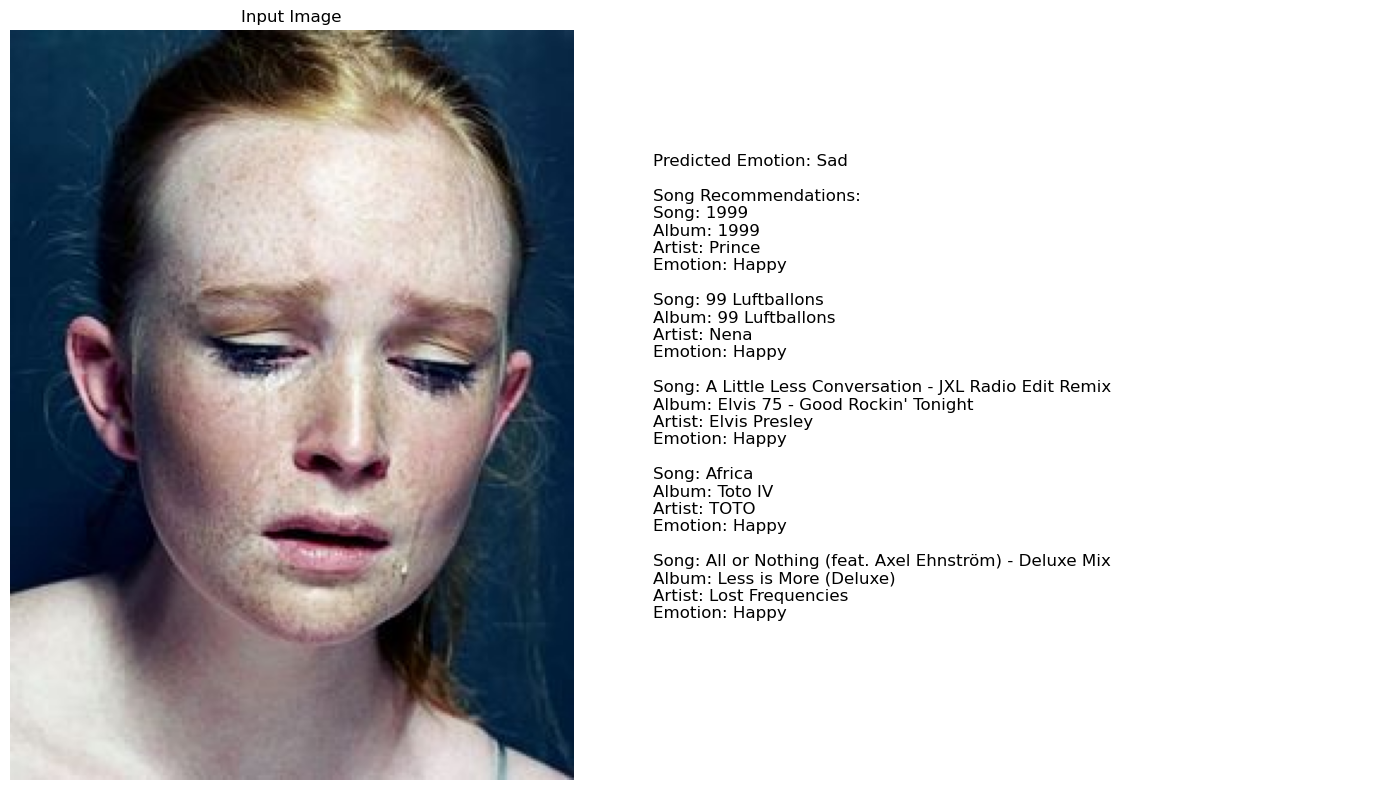

In [ ]:
# Example usage
image_path = r'C:\Users\SMares\Downloads\EmotionBasedMusicRecommendationSystem\EmotionBasedMusicRecommendationSystem/uploads/sadimg.jpg'  # Update with the actual path to your image
predicted_emotion = predict_emotion(image_path)
song_recommendations = get_song_recommendations(predicted_emotion)
display_results(image_path, predicted_emotion, song_recommendations)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


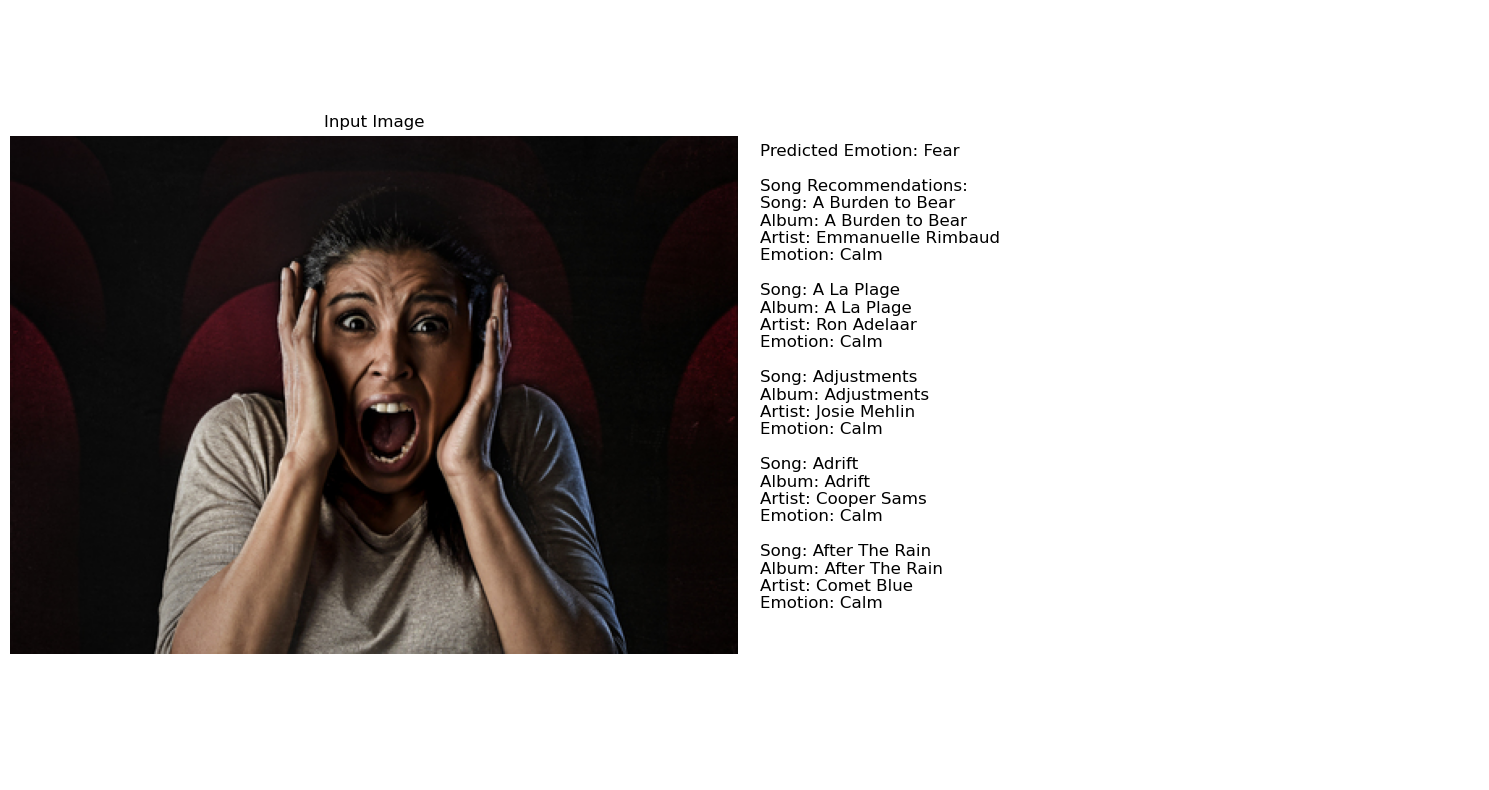

In [ ]:
# Example usage
image_path = r'C:\Users\SMares\Downloads\EmotionBasedMusicRecommendationSystem\EmotionBasedMusicRecommendationSystem/uploads/fear.jpg'  # Update with the actual path to your image
predicted_emotion = predict_emotion(image_path)
song_recommendations = get_song_recommendations(predicted_emotion)
display_results(image_path, predicted_emotion, song_recommendations)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


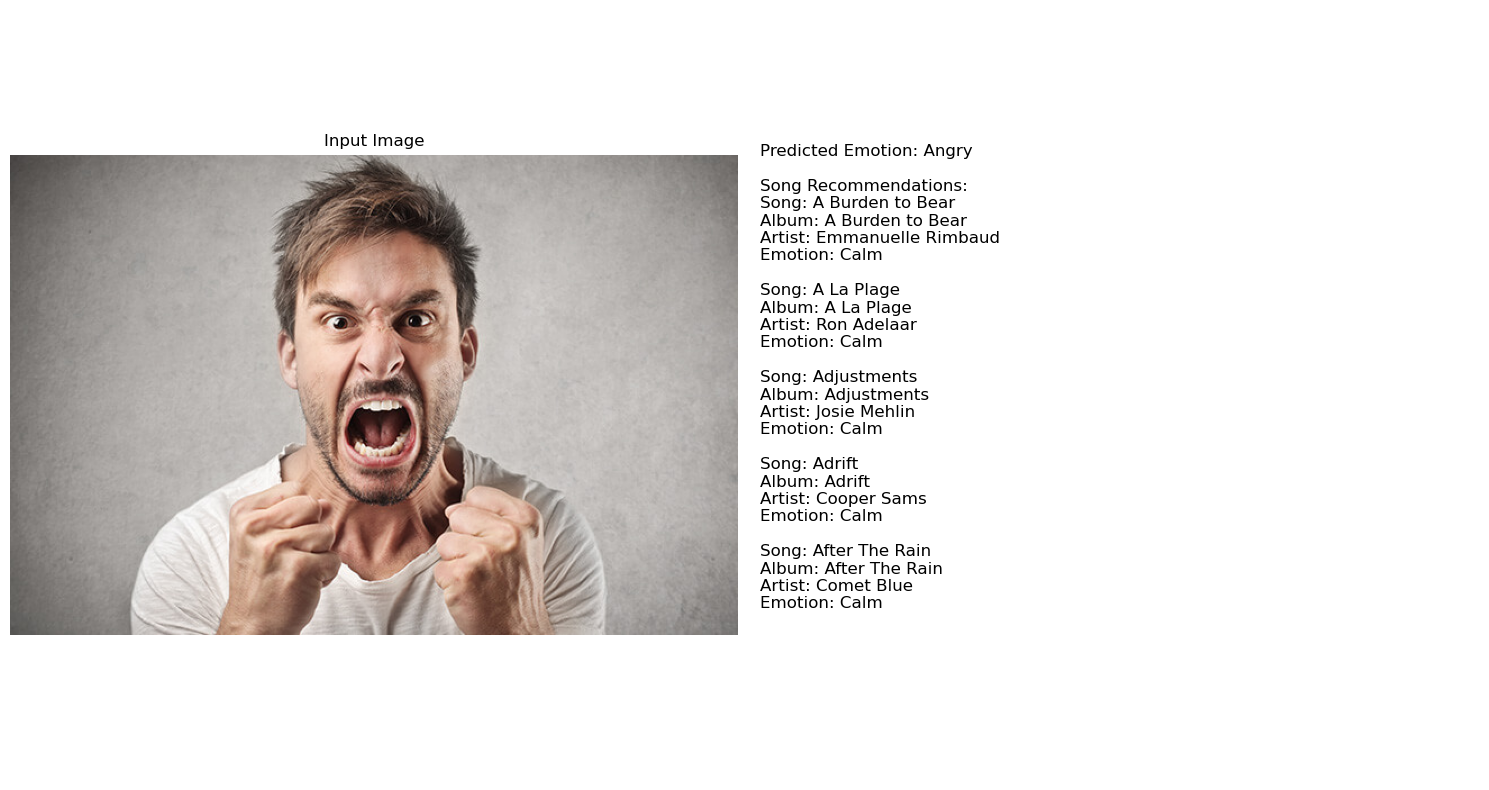

In [ ]:
# Example usage
image_path = r'C:\Users\SMares\Downloads\EmotionBasedMusicRecommendationSystem\EmotionBasedMusicRecommendationSystem/uploads/angry image rec test.jpg'  # Update with the actual path to your image
predicted_emotion = predict_emotion(image_path)
song_recommendations = get_song_recommendations(predicted_emotion)
display_results(image_path, predicted_emotion, song_recommendations)